# Numerical Methods 2 - Optimization
___
Continuing on...

As we're continuing from last time, let me just redefine and run some of the equations from before

In [2]:
# Define colors
Pitt.Blue<-"#003594"
Pitt.Gold<-"#FFB81C"
Pitt.DGray <- "#75787B"
Pitt.Gray <- "#97999B"
Pitt.LGray <- "#C8C9C7"
# ggplot preferences
library("ggplot2")
library("repr")
options(repr.plot.width=10, repr.plot.height=10/1.68)
base<- ggplot() +aes()+ theme( panel.background = element_rect(fill = "white", linewidth = 0.5, linetype = "solid"),
  panel.grid.major = element_line(linewidth = 0.5, linetype = 'solid', colour =Pitt.Gray), 
  panel.grid.minor = element_line(linewidth = 0.25, linetype = 'solid', colour = "white")
  )
#Find out the weights for our numerical solver for first derivative
# First Order derivative function
A=matrix(1:35, nrow = 5, ncol = 5)
for(i in -2 : 2) {
    A[3-i,1]=1 # This just makes sure 2 is in the 1 slot
    for (j in 2:5) {
        A[3-i,j]= (i**(j-1))/factorial(j-1)
    }
}
b=matrix(0, nrow = 5, ncol = 1)
Deriv=1
b[Deriv+1,1]=1
Ai=solve(A) # Take the matrix inverse of the transoise
w1=t(b) %*% Ai
colnames(w1)<-c("f(x+2d)","f(x+d)","f(x)","f(x+d)","f(x-2d)")
w1
w1*12
StudentList<-read.csv('../Students.csv')
selstudent<-function(n) {
    sel<-data.frame(sample(StudentList$Student,n,replace=FALSE))
    names(sel)<-"Selection"
    sel
}

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3373871444.py, line 10)

In [7]:
# Second-order derivative function
b=matrix(0, nrow = 1, ncol = 5)
Deriv=2
b[1,Deriv+1]=1
Ai=solve(A) # Take the matrix inverse of the transoise
w2=b %*% Ai
colnames(w2)<-c("f(x+2d)","f(x+d)","f(x)","f(x+d)","f(x-2d)")
w2
12*w2

f(x+2d),f(x+d),f(x),f(x+d),f(x-2d)
-0.08333333,1.333333,-2.5,1.333333,-0.08333333


f(x+2d),f(x+d),f(x),f(x+d),f(x-2d)
-1,16,-30,16,-1


In [8]:
# These are the centered methods, so they're an order more accurate.
# So this will be an O(e^4) method
n.deriv.1<-  function(f,x,eps=1e-6) (-f(x+2*eps)/12+8*f(x+eps)/12-8*f(x-eps)/12+f(x-2*eps)/12)/eps
# This will be an O(e^3) method (dividing by eps^2!)
n.deriv.2<-  function(f,x,eps=1e-3)  (-f(x+2*eps)/12+16*f(x+eps)/12-30*f(x)/12+16*f(x-eps)/12-1*f(x-2*eps)/12)/eps**2

# Numerical Methods
So, having gone over a very simple set of equations, let's come back to option 1 here.
- [x] Numerical derivatives
- [x] Numerical solutions to equations
- [ ] Numerical Optimization

## Numerical Optimization

We're going to show how numerical optimization works within 
 - one dimension
 - with a continuous function 

While I'll talk about the extensions to multiple dimensions for the derivative methods we'll talk about, there are many other methods, and lots of lots of details., I'll give you a quick overview of some of the other methods, why we might need them,  and the terminology.


If the problem is smooth (and this generalizes to multiple dimensions) then we can try to use the same **first-order conditions** that you've used in the theoretical parts of the course.

That is, a necessary condition to be at an optimal point for a continous differentiable function is that the slope is zero:
$$ f^\prime(x)=0$$



![Image](https://alistairjwilson.github.io/MQE_AW/i/OptimalSlope.gif)

## Option 1
Just code up the analytical derivative, and solve for its roots! As we will see, in some situations, this will be possible, but in others an analytical solution will be a bear, in which case we'll opt for **Option 2** below.

But, for the examples we looked at before, this is definitely a possibility.

Define the analytical derivatives of $ f(x)= 2 x^2 - 10 x + 3 $ and $g(x)=f(x)e^{-x/10}$

In [30]:
f <- function(x) 2*x**2-10*x+3
g <-function(x) f(x)*exp(-x/10)
d.f <- function(x) 4*x-10
d.g <-function(x) -0.1*exp(-0.1*x)*f(x)+exp(-0.1*x)*(2*2*x-10)

And so we can use the previous Newton-Rhapson routine, but where we'll change the input function

In [31]:
newton.rhapson<-function(func.in,x0,tol=1e-8,eps=1e-6,output=FALSE) {
    xx=x0  # initial value 
    fval=func.in(xx) 
    Error=abs(func.in(xx)) # how far away from zero is it!
    ii=1 # here we'll generate a counter for the number of steps
    # Repeat the steps until the error is less than the tolerance
    while (Error>tol){
        fd=n.deriv.1(func.in,xx,eps) # take the numeric derivative using our prev formula
        xx=xx-fval/fd # Newton-Rhapson iteration from formula
        fval=func.in(xx) 
        Error=abs(fval) # How far from zero now!
        ii=ii+1
    } 
    if (output) print(paste("Converged to solution ",  toString(round(xx,digits=5))," in ",toString(ii-1)," steps"))
    xx
}

*Note: this is still using a numerical derivative function. You could get rid of that too if you had an analytical expression for the the second derivative function too.*

So let's look for the optimal solutions to our easy function $ f(x)= 2 x^2 - 10 x + 3 $ by looking for a solution to $ f^\prime(x)= 0$

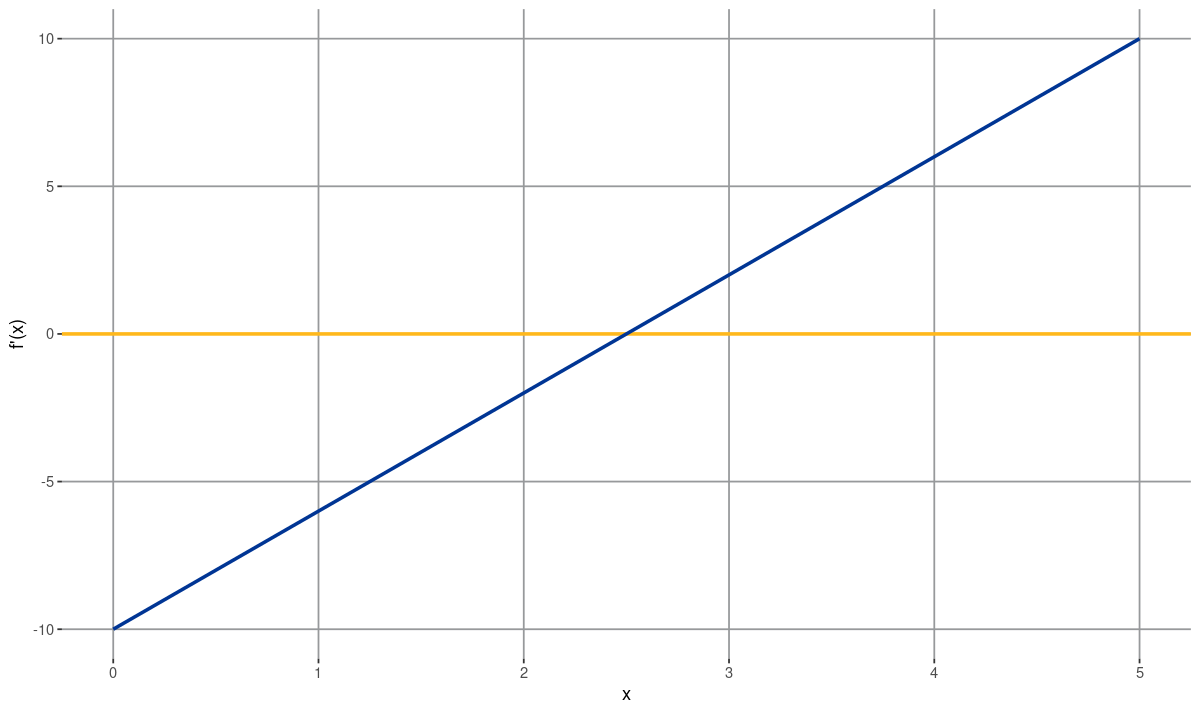

In [32]:
base+ geom_hline(yintercept=0,color=Pitt.Gold,linewidth=1)+geom_function(fun = d.f, colour=Pitt.Blue, linewidth=1)+ 
xlab('x') +ylab("f'(x)")+xlim(0,5)

So this clearly has only one solution (which is easy to get from $f^\prime(x)=4x-10=0$):

In [33]:
f.sol<-newton.rhapson(d.f,1,output=TRUE) 

[1] "Converged to solution  2.5  in  1  steps"


And for the optimal solutions to our medium function $ g(x)= \left(2 x^2 - 10 x + 3 \right)e^{-x/10}$, looking for roots to $g^\prime(x)=0$

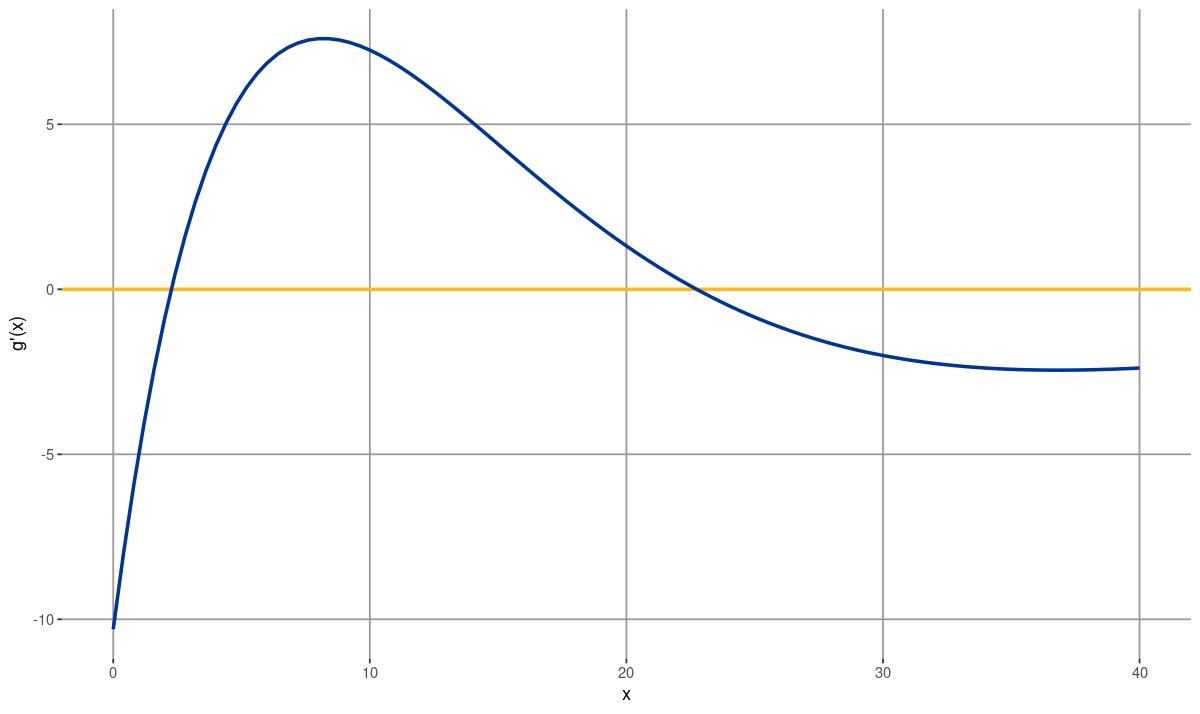

In [34]:
n.deriv.1<-  function(f,x,eps) {
    # So this will be an O(e^4) method
    (w1[1]*f(x+2*eps)+w1[2]*f(x+eps)+w1[3]*f(x)+w1[4]*f(x-eps)+w1[5]*f(x-2*eps))/eps  
}
base+ geom_hline(yintercept=0,color=Pitt.Gold,linewidth=1)+geom_function(fun = d.g, colour=Pitt.Blue, linewidth=1)+ 
xlab('x') +ylab("g'(x)") +xlim(0,40)

So this has at least two solutions:

In [35]:
g.sol.1<-newton.rhapson(d.g,0, output=TRUE)
g.sol.2<-newton.rhapson(d.g,20, output=TRUE)
g(2.26526)
g(22.73474)

[1] "Converged to solution  2.26526  in  5  steps"
[1] "Converged to solution  22.73474  in  4  steps"


[1] -7.48647

[1] 83.32979

## Option 2
Suppose we don't want to even think about the derivatives, then we can just go fully numeric!

In [36]:
newton.rhapson.fullnumeric<-function(f,x0,tol=1e-8,eps=1e-6,maxiter=50,output=FALSE) {
    # argumens: f: function to optimize, x0: initial guess
    xx=x0
    #This is our equation for the derivative
    fval=n.deriv.1(f,xx,eps)
    Error=abs(fval)
    ii=1
    # Repeat the steps until the error is less than the tolerance
    while (Error>tol & ii <maxiter ){
        # this is our equation for the second derivative
        fd=n.deriv.2( f , xx, sqrt(eps) )
        # So this is the Newton-rhapson step for
        # solving the derivative root
        # via x1=x0-f'(x0)/f"(x0)
        xx=xx-fval/fd
        fval=n.deriv.1(f,xx,eps)
        Error=abs(fval)
        ii=ii+1
    } 
    if (ii>=maxiter) print("Exited due to non-convergence")        
    if (output && ii<maxiter ) print(paste("Converged to solution ",  toString(round(xx,digits=5))," in ", toString(ii-1)," steps"))
    xx
}

For the easy function:
$$ f(x)= 2 x^2 - 10 x + 3 $$

In [37]:
f.sol.nd<-newton.rhapson.fullnumeric(f,x0=1,output=TRUE)
# Differences?
fsol<-f.sol.nd

[1] "Converged to solution  2.5  in  1  steps"


For the medium function:
$$ g(x)= \left(2 x^2 - 10 x + 3 \right)e^{-x/10}$$

In [38]:
g.sol.1.nd <- newton.rhapson.fullnumeric(g,0,output=TRUE)
g.sol.2.nd <- newton.rhapson.fullnumeric(g,20,output=TRUE)
# Differences?
c(g.sol.1 -g.sol.1.nd,  g.sol.2-g.sol.2.nd )

[1] "Converged to solution  2.26526  in  5  steps"
[1] "Converged to solution  22.73474  in  6  steps"


[1] -5.351115e-10 -2.797166e-08

So identical solutions to the version where we calculated the derivatives.

But what type of solutions are they?

![Image](https://alistairjwilson.github.io/MQE_AW/i/OptimalSlope.gif)

Both local minima and local maxima satistfy the $f^\prime(x)=0$ condition

## Type of optima 
While all of the solutions satisfy $f^\prime(x)=0$ we can figure out whether it's a local minima or maxima by how the slopw changes around this point.
* For maxima the slope must be:
    - increasing to the  right
    - decreasing to the left
* For minima the slope must be:
    - decreasing to the right
    - increasing to the left

So this implies that:
 * For a maxima our second derivative estimate should be negative
     - slope decreasing over $x$, $f^{\prime\prime}(x)<0$
 * For a minima our second derivative estimate should be positive
     - slope increasing over $x$, $f^{\prime\prime}(x)>0$

So we can check the 2nd derivative at each solution:

In [57]:
# Check soc for solution 1
#g.sol.1
n.deriv.2( g , g.sol.1,1e-5 )
# Check soc for solution 2
#g.sol.2
n.deriv.2( g , g.sol.2 ,1e-5)

[1] 3.264063

[1] -0.421787

So the first solution is a local minima, the second solution a local maxima. As this is in one dimension, easy to check it with a graph.

[1] 3

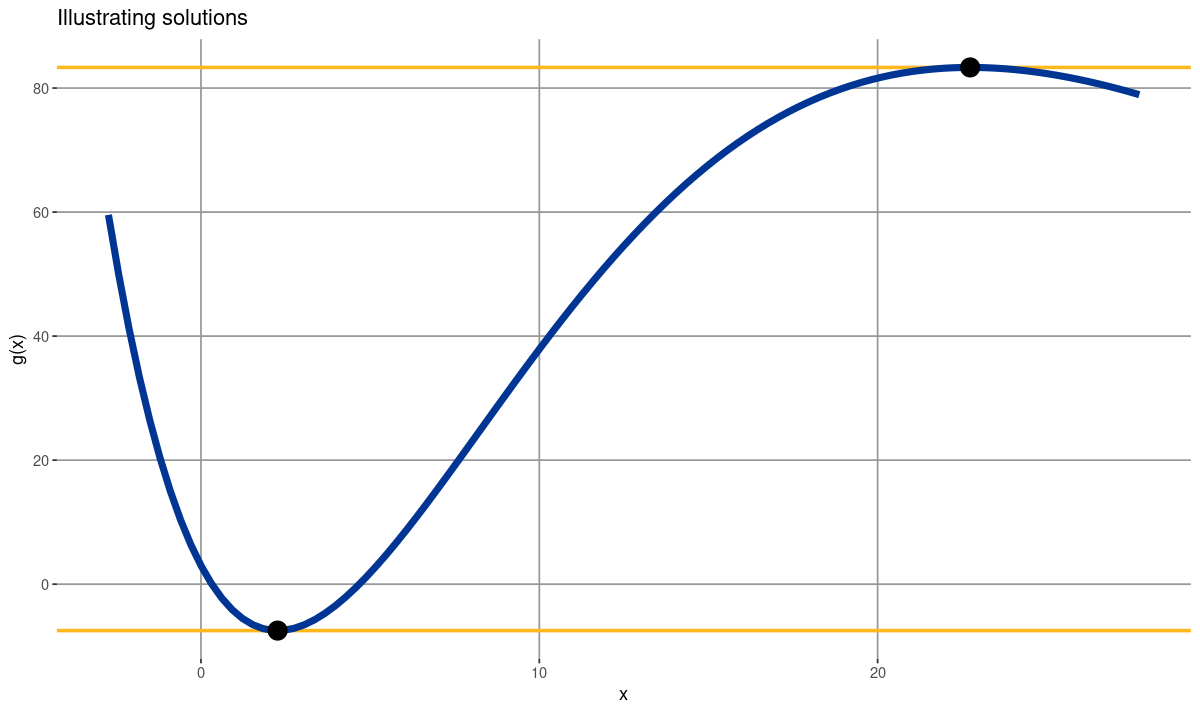

In [58]:
base+ geom_hline(yintercept=g(g.sol.1), color=Pitt.Gold,linewidth=1)+
geom_hline(yintercept=g(g.sol.2), color=Pitt.Gold,linewidth=1)+
geom_function(fun = g, colour=Pitt.Blue, linewidth=2)+
geom_point(aes(x=g.sol.1,y=g(g.sol.1)),size=5,color="black")+
geom_point(aes(x=g.sol.2,y=g(g.sol.2)),size=5,color="black")+
ggtitle("Illustrating solutions") + xlab('x') +ylab('g(x)')+xlim(g.sol.1-5,g.sol.2+5)
g(0)

## Global vs Local optima
However, only one of these is a **global** optima. Which one?

* If we're considering any value of $x\in\mathbb{R}$ the the maxima  is not a global max as we can find values of $x$ where g(x) is larger!
    - For very negative values of $x$ the function beomes unboundely large.
    - If we narrowed the range for $x$ to be $x\geq0$ then it would be global

* The local minima we identified is also a global minimizer of the function
    - For very large values of $x$ the value of the function tends to zero from above.
    - The value at the second solutions is negative

Can see this if we zoom out on the graph

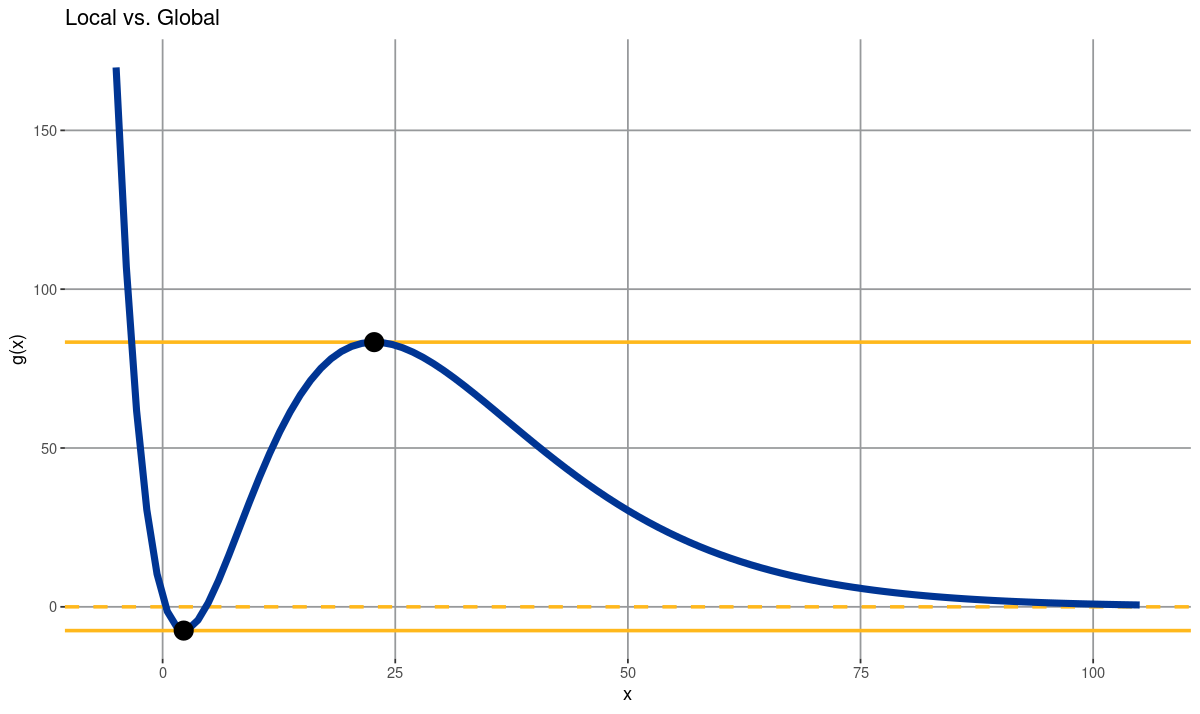

In [41]:
base+ geom_hline(yintercept=g(g.sol.1), color=Pitt.Gold,linewidth=1)+
geom_hline(yintercept=g(g.sol.2), color=Pitt.Gold,linewidth=1)+
geom_hline(yintercept=0, color=Pitt.Gold,linewidth=1,linetype="dashed")+
geom_function(fun = g, colour=Pitt.Blue,linewidth=2)+
geom_point(aes(x=g.sol.1,y=g(g.sol.1)),size=5,color="black")+
geom_point(aes(x=g.sol.2,y=g(g.sol.2)),size=5,color="black")+
ggtitle("Local vs. Global") + xlab('x') +ylab('g(x)')+xlim(-5,105)

## Local solutions
When we're minimizing an objective function that is not single-peaked/troughed, then our methods can sometimes get stuck at local solutions, and not find our way to 

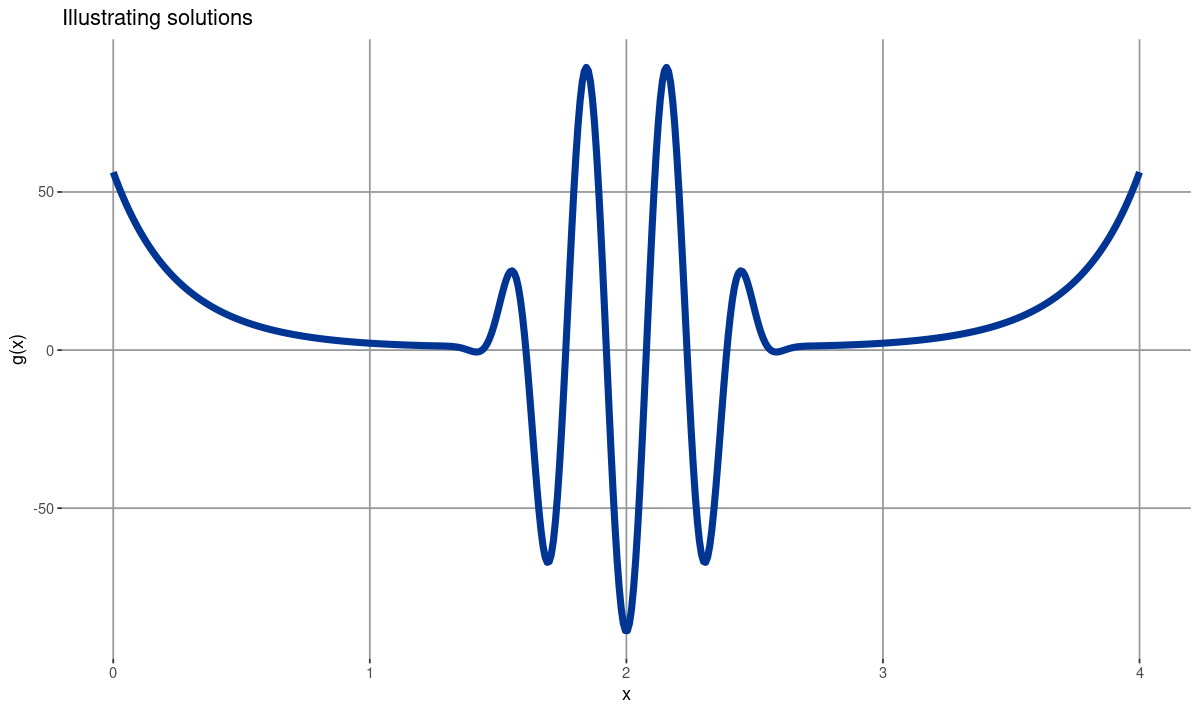

In [59]:
wavy.f<- function(x)  (-(x-2)**2)*cos((x-2))-90*cos(20*(x-2))*exp(-30*(x-2)**4)+ exp((x-2)**2)
base+ggtitle("Illustrating solutions") + xlab('x') +ylab('g(x)')+xlim(0,4)+
geom_function(fun = wavy.f, colour=Pitt.Blue, linewidth=2, n=500)

In [61]:
newton.rhapson.fullnumeric(wavy.f,0,output=TRUE)
newton.rhapson.fullnumeric(wavy.f,1.6,output=TRUE)
newton.rhapson.fullnumeric(wavy.f,8,output=TRUE)
newton.rhapson.fullnumeric(wavy.f,2.3,output=TRUE)
newton.rhapson.fullnumeric(wavy.f,2.05,output=TRUE)
newton.rhapson.fullnumeric(wavy.f,2.1,output=TRUE)

[1] "Converged to solution  1.4159  in  12  steps"


[1] 1.415897

[1] "Converged to solution  1.55329  in  5  steps"


[1] 1.553288

[1] "Converged to solution  2.5841  in  44  steps"


[1] 2.584103

[1] "Converged to solution  2.30567  in  3  steps"


[1] 2.30567

[1] "Converged to solution  2  in  7  steps"


[1] 2

[1] "Converged to solution  2.15594  in  8  steps"


[1] 2.155943

## More dimensions
So the equations we've been optimizing so far have been with a single input. How does this all generalize to more dimensions?

As an example, consider:
$$ f(x_1,x_2)=2 x_1^2+2 x_2^2-2 x_1 x_2 - 5x_1+x_2$$
This type of function is still pretty easy for us to solve analytically, where the first-order conditions are:
$$\begin{array}{rccl} 
\frac{\partial f(x_1,x_2)}{\partial x_1} & = & 4 x_1- 2 x_2 -5&=0 \\
\frac{\partial f(x_1,x_2)}{\partial x_2} & = & 4 x_2- 2 x_1 +1 &=0 \end{array}
$$

This can be solved to find the unique minimizing solution here: $x_1^\star=\tfrac{3}{2}$ and $x_2^\star=\tfrac{1}{2}$.

In [62]:
# define a function of 2 inputs
f2 <- function(x) (2* x[1]^2 +2*x[2]^2-2*x[1]*x[2]-5*x[1]+x[2])

In [63]:
f2( c(0,0) )
f2( c(1.5,0.5) )
f2( c(1.6,0.4) )

[1] 0

[1] -3.5

[1] -3.44

$$ f(x_1,x_2)=2 x_1^2+2 x_2^2-2 x_1 x_2 - 5x_1+x_2$$

![Image](https://alistairjwilson.github.io/MQE_AW/i/MultiObj.png)

Can we minimize this function numerically?

The answer is yes. There are a few more details (and a bit more multi-variate calculus). In particular, we need to define: 
* the gradient vector of partial derivatives  $\nabla f=\left(\frac{\partial f}{\partial x_1}, \ldots ,\frac{\partial f}{\partial x_n}\right)^T$
* The matrix of second-order derivatives called the **Hessian** matrix: $$\mathbf{H_f}(x) =\left[ \begin{array}{cccc} 
\frac{\partial^2 f}{\partial x_1^2} &\frac{\partial^2 f}{\partial x_1\partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1\partial x_n} \\
\frac{\partial^2 f}{\partial x_2^2} &\frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n\partial x_1} &\frac{\partial^2 f}{\partial x_n\partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{array}\right]$$


I'm not going to get into all of the details, but the numerical methods work similarly to before.

The analog to our second-order condition with one variable relates to a property of the Hessian matrix $\mathbf{H}$ assessed at each optima, whether it is: 
* Positive definite: for every  non-zero vector $\mathbf{z}$ we have $\mathbf{z}^T \mathbf{H} \mathbf{z}>0$ then we have a local **minimum**
* Negative definite: for every  non-zero vector $\mathbf{z}$ we have $\mathbf{z}^T \mathbf{H} \mathbf{z}<0$ then we have a local **maximum**

These conditions are actually easy to compute numerically as there's a relationship with the eigenvalues.

## Optimization in R
R has several optimization routines already coded, and I'm not going to go into the algorithms for each to much. However, a simple gradient based method is implemented here using the `optim()` function.

In [47]:
f2.optim<-optim(c(0,0) ,f2, method = "BFGS", hessian=TRUE)
f2.optim

4,-2
-2,4


Let's look at the returned optimal value:

In [64]:
names(f2.optim$par)<- c("Optimal x1","Optimal x2")
f2.optim$par 

Optimal x1 Optimal x2 
       1.5        0.5

So this is really close to the exact optimal!

Can also check that this is a minimizer of the function via the optional returned Hessian matrix:

In [65]:
#install.packages('matrixcalc')
library(matrixcalc)
is.positive.definite(f2.optim$hessian)
is.negative.definite(f2.optim$hessian)

[1] TRUE

[1] FALSE

The `optim()` function minimizes whichever function you provide it. As such, if you're after a maximizer, you should multiply your function by -1!

## Finding local values
As we saw, when the function has lots of minima, it can be difficult for us to find the right solution using gradient methods.

This doesn't go away with more dimensions!

In [28]:
# Define a two dimensional version of our wavy function from before
wavy.f.dim2 <- function(x) (wavy.f(x[1])+90)*(1+(x[2]-3)**2)/100
wavy.sol<-optim(c(0,0),wavy.f.dim2,method = "BFGS")
# This is the actual global minimum of the function
wavy.f.dim2(c(2,3)) 

# This is the function value we get using the gradient based method:
wavy.f.dim2(wavy.sol$par)

[1] 0.01

[1] 0.8938564

## Non-gradient methods
There are also several other methods available, some of which use gradients, some of which do not.

In fact, the default method (called Nelder-Mead) does not use gradients at all. Instead, it creates a mesh that's one dimension bigger than the function it's trying to optimize. A really nice visualization of the Nelder-Mead algorithm is given [here](https://www.benfrederickson.com/numerical-optimization/)

In [68]:
wavy2.sol.nm <- optim( c(0,0), wavy.f.dim2 )
wavy2.sol.nm$par
wavy.f.dim2(wavy2.sol.nm$par)

[1] 1.999996 2.998545

[1] 0.01000002

Nelder-Mead can do poorly though on high-dimensional problems (see the city-pair examination at the end of the [visualization link](https://www.benfrederickson.com/numerical-optimization/)), or where there is some flatness in the objective.

Nelder-Mead, also performs quite poorly on one-dimensional problems. In fact, R will warn you if you try to use it there:

In [70]:
#optim(12,wavy.f)
# it wants you to use: optim(3,wavy.f, method="Brent", lower=-10,upper=20)
optim(3,wavy.f, method="Brent", lower=-10,upper=20)
wavy.f(0)

$par
[1] 1.415897

$value
[1] -0.6143612

$counts
function gradient 
      NA       NA 

$convergence
[1] 0

$message
NULL

[1] 56.26274

In fact, for one-dimensional problems on a fixed interval, you can use a different function:

In [71]:
optimize(g,interval=c(-10,5 )) 
optimize(wavy.f,interval=c(1.5,2.5)) 
wavy.f(2)

$minimum
[1] 2.265267

$objective
[1] -7.48647

$minimum
[1] 2.305674

$objective
[1] -67.25828

[1] -89

## Simulated Annealing
One available method that does get used a fair amount when we're very concerned about reaching global maxima/minima is called simulated annealing.
* This is a stochastic method, where by the computer makes a series of random calls to the function
* Can see a partial visualization of this in this [YouTube video](https://www.youtube.com/watch?v=iaq_Fpr4KZc)
* More sophisticated versions of this incorporating selection dynamics in the random points also exist (genetic algorithms)
* These optimization methods can be more time-consuming though

In [72]:
# On our simple function 
optim(c(0,0),wavy.f.dim2, method="SANN")

$par
[1] 2.000230 2.951271

$value
[1] 0.01003325

$counts
function gradient 
   10000       NA 

$convergence
[1] 0

$message
NULL

In [74]:
# On our very wavy function
optim(0,wavy.f, method="SANN")

Warning message in optim(0, wavy.f):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


$par
[1] 1.415918

$value
[1] -0.6143607

$counts
function gradient 
      40       NA 

$convergence
[1] 0

$message
NULL

Can also combine the simulated-annealing approach with some gradient-based methods.

Here I'll do it for the final value, though you could imagine doing this at intermediate steps too.

In [56]:
sol1.sann<-optim(c(0,0),wavy.f.dim2, method="SANN")
optim(sol1.sann$par,wavy.f.dim2, method="BFGS")

$par
[1] 2.000000 2.999667

$value
[1] 0.01

$counts
function gradient 
      36       18 

$convergence
[1] 0

$message
NULL

There are variants of the random approach in simulated annealing but with an evolutionary approach to selection in a population of random points too, where these are called genetic algorithms.

## Non-uniqueness

Sometimes our objective does not have a unique maximizer

Consider the function:
$$ f(x_1,x_2)=-(x_1+x_2-3)^2$$

Any value of $(x_1,x_2)$ that sums to 3 will minimize it. 

This relate to a problem of identification when we come back to estimation:

Suppose $x_1$ is *ability* and $x_2$ is *effort*. Together they generate *output* given by $x_1+x_2$
* The idea then is that $(x^\star_1+x^\star_2)=\text{output}=3$ could be identified in our data
* However, whether that output is coming from ability or effort, we cannot discern

In [87]:
# define a function of 2 inputs
fsaddle <- function(x) (x[1]+x[2]-3)**2 +(x[1]^2)*0.000001

In [88]:
fsaddle(c(3,3))

[1] 9.000009

In [89]:
optim(c(0,0),fsaddle,method="BFGS",hessian=TRUE)

2.000002,2
2.000000,2
